# Labolatorium 11
## Generatory Liczb Losowych

---
### Przydatne funkcje:
* generator typu Mersenne Twister: `random.random`
* generator typu PCG64: `numpy.random.default_rng.random`
* test normalności Shapiro-Wilka: `scipy.stats.shapiro`

In [119]:
from random import random as MersenneTwister
from numpy.random import default_rng
from scipy.stats import shapiro, norm
from scipy import special
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
PCG_64 = default_rng().random 

---
### Zadanie 1 Testowanie generatorów liczb losowych

Dla obydwu generatorow liczb losowych (Mersenne Twister oraz PCG64) oraz dla $n = 10, 1000, 5000$ wylosuj $n$ liczb losowych pochodzących z rozkładu jednostajnego i wykonaj następującego kroki:
1. Zwizualizuj na wykresie rozkład liczb w 10 równych przedziałach
2. Sprawdź dla ilu liczb spełniona jest równość $x_i < x_{i+1}$. Ile powinno ich być dla idealnego generatora?
3. Zaimplementuj jeden z testów zdefiniowanych w rozdziale drugim artykułu https://csrc.nist.gov/publications/detail/sp/800-22/rev-1a/final i wykorzsytaj go do sprawdzenia wylosowanego ciągu liczb.
    
Czy widać różnice pomiędzy generatorami? Czy wraz z rosnącym n coś się zmienia?

In [120]:
N = [10, 1000, 5000]

In [121]:
def plot_samples(samples, title="", bins=10):
    fig = plt.figure(figsize=(14, 6))
    arr = plt.hist(samples, bins=bins, range=(0.0, 1.0), align="mid", rwidth=0.9)
    for i in range(bins):
        plt.text(arr[1][i] + 0.03 ,arr[0][i],str(arr[0][i]), fontsize=16)
    fig.suptitle(title, fontsize="22")
    plt.show()

Powyższa funkcja `plot_samples` przedstawi nam na wykresie ile wylosowanych próbek należy do danego przedziału (będzie 10 takich równych przedziałów). Będzie to zatem histogram na przedziale $[0, 1)$ z 10 słupkami (`bins`).

In [122]:
def count_ascending(samples):
    n = samples.shape[0]
    ascending = 0
    for i in range(n-1):
        ascending += samples[i] < samples[i+1]
    return ascending + 1 if ascending > 0 else 0

Powyższa funkcja `count_ascending` zlicza dla ilu liczb zachodzi nierówność $x_i < x_{i+1}$. Dla idealnego generatora powinno to być $\frac{n}{2}$ gdzie $n$ to ilość wylosowanych liczb.\
**Uzasadnienie:**
Ponieważ mamy idealny generator to nigdy nie powinno zachodzić $x_i = x_{i+1}$ (Prawdopodobieństwo wylosowania dwóch takich samych liczb ze zbioru o nieskończonej ilości elementów dąży do 0).\
Zatem zawsze zachodzi jedna z nierówności $x_i < x_{i+1}$ lub $x_i > x_{i+1}$.\
Ponieważ generator jest idealny - żadna z tych nierówności nie powinna być *faworyzowana*, zatem $\frac{n}{2}$ liczb powinno spełniać każdą z nich.

In [123]:
def plot_asc(mt, pcg, expected):
    fig = plt.figure(figsize=(14, 6))
    fig.suptitle("Ilość liczb spełniających nierówność x_i < x_i+1", fontsize=22)
    plt.bar(range(1, 3), [mt, pcg], width=0.5)
    plt.text(0.8, mt, f"Mersenne Twister = {mt}", fontsize=16)
    plt.text(1.85, pcg, f"PCG64 = {pcg}", fontsize=16)
    plt.text(0.7, expected, "n/2", color="red", fontsize=14)
    plt.axhline(y=expected, linewidth=2, linestyle="dotted", color="red")
    plt.show()

Powyższa funkcja prezentuje wyniki `count_ascending` na wykresie i porównuje je z oczekiwaną wartością.

In [124]:
def frequency_monobit_test(samples):
    n = samples.shape[0]
    S = 0.0
    for u in samples:
        S += 2 * round(u) - 1.0
    
    s = abs(S) / np.sqrt(n)
    p_value =  special.erfc(s / np.sqrt(2))
    
    return p_value >= 0.01, p_value, s

Powyżej w funkcji `frequency_monobit_test` zaimplementowałem test opisany w podrozdziale 2.1 o nazwie *Frequency (Monobit) test*.
Poniżej jego działanie w skrócie:\
$\large \epsilon$ <- losowy ciąg bitów o długości $n$ wygenerowany przez nasz losowy algorytm\
$\large S = sum(2 \cdot \epsilon_i - 1)$, gdzie $\epsilon_i$ to $i-ty$ bit naszego losowego ciągu\
$\large s_{obs} = \frac{|S|}{\sqrt{n}}$\
$\large P\_value = \frac{s_{obs}}{\sqrt{2}}$\

Jeśli P_value jest < 0.01 to wnioskujemy, że nasz ciąg nie jest losowy. W przeciwnym wypadku nasz ciąg jest losowy.

In [125]:
def show_frequency_test(samples):
    pass_test, p_value, s = frequency_monobit_test(samples)
    
    print(f"Frequency (Monobit) Test został spełniony? -> {pass_test}")
    print(f"Test P_value -> {p_value}")
    print(f"Test s_obs -> {s}")
    

In [126]:
def test_generators(n):
    mt_samples = np.array([MersenneTwister() for _ in range(n)])
    pcg_samples = PCG_64(size=n)
    # 1.1
    plot_samples(mt_samples, f"Mersenne Twister histogram dla n = {n}")
    plot_samples(pcg_samples, f"PCG64 histogram dla n = {n}")
    # 1.2
    mt_asc = count_ascending(mt_samples)
    pcg_asc = count_ascending(pcg_samples)
    plot_asc(mt_asc, pcg_asc, n//2)
    # 1.3
    print(f"\n\n-----------Frequency Monobit Test dla n = {n}-----------\n")
    print("MERSENNE TWISTER\n")
    show_frequency_test(mt_samples)
    print("\n--------------\n")
    print("PCG_64\n")
    show_frequency_test(pcg_samples)
    

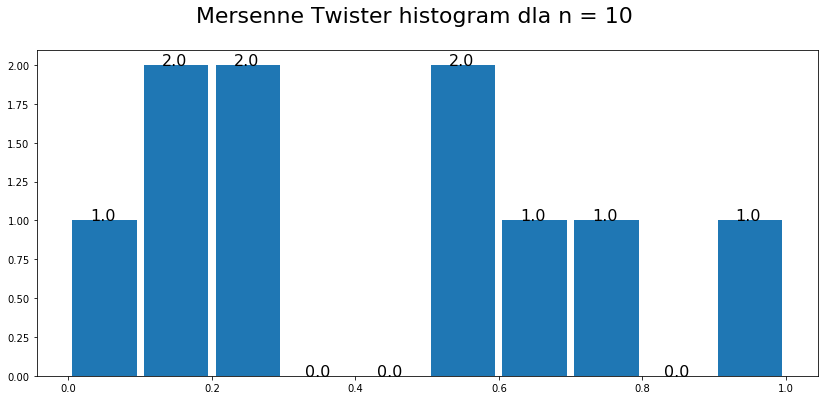

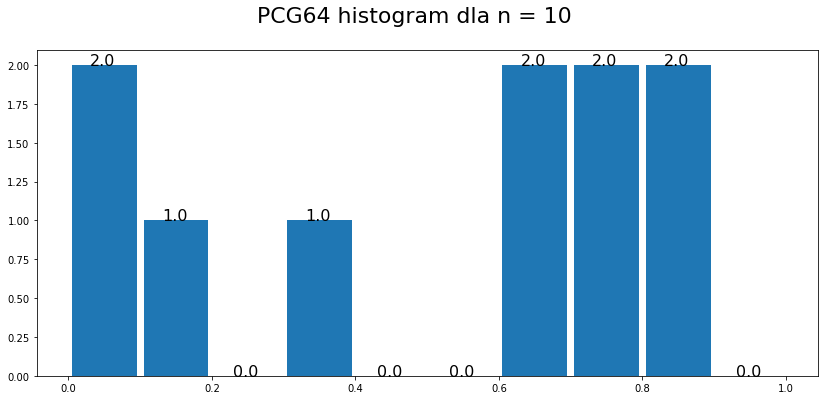

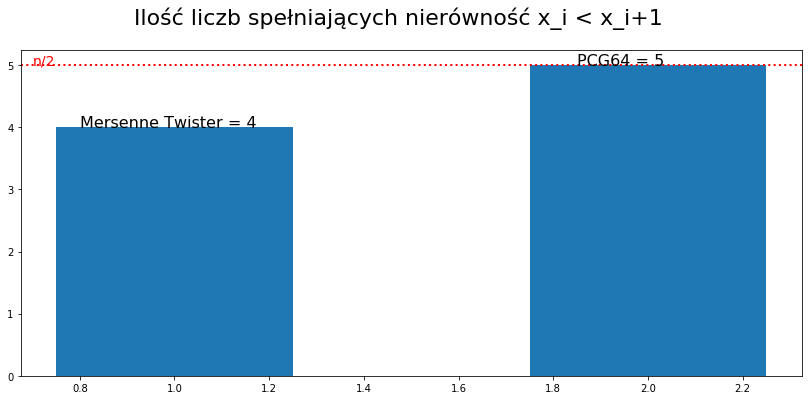



-----------Frequency Monobit Test dla n = 10-----------

MERSENNE TWISTER

Frequency (Monobit) Test został spełniony? -> True
Test P_value -> 1.0
Test s_obs -> 0.0

--------------

PCG_64

Frequency (Monobit) Test został spełniony? -> True
Test P_value -> 0.5270892568655381
Test s_obs -> 0.6324555320336759


In [127]:
test_generators(N[0])

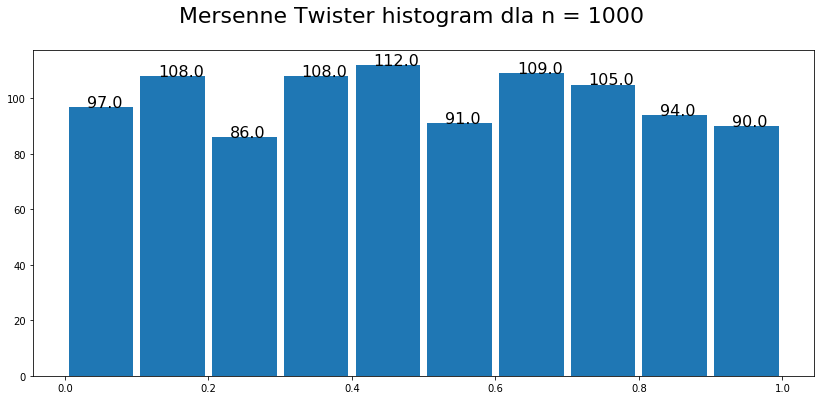

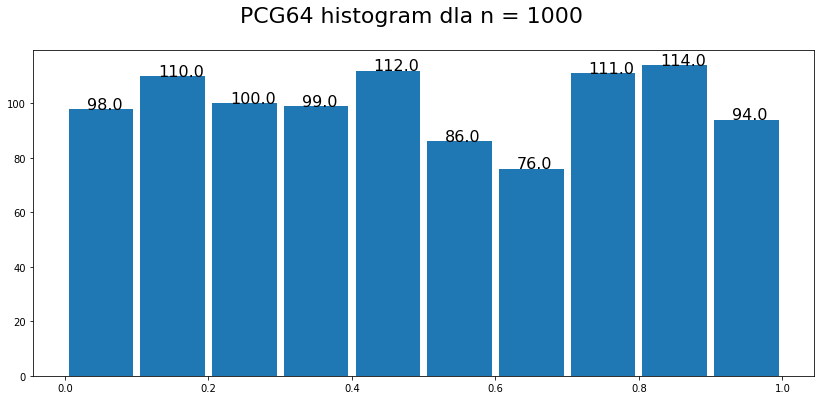

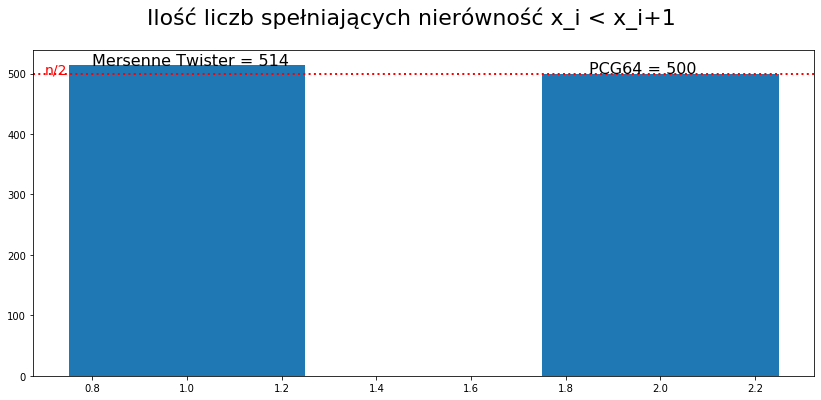



-----------Frequency Monobit Test dla n = 1000-----------

MERSENNE TWISTER

Frequency (Monobit) Test został spełniony? -> True
Test P_value -> 0.4866160457640506
Test s_obs -> 0.6957010852370434

--------------

PCG_64

Frequency (Monobit) Test został spełniony? -> True
Test P_value -> 0.22949314873258364
Test s_obs -> 1.2016655108639842


In [128]:
test_generators(N[1])

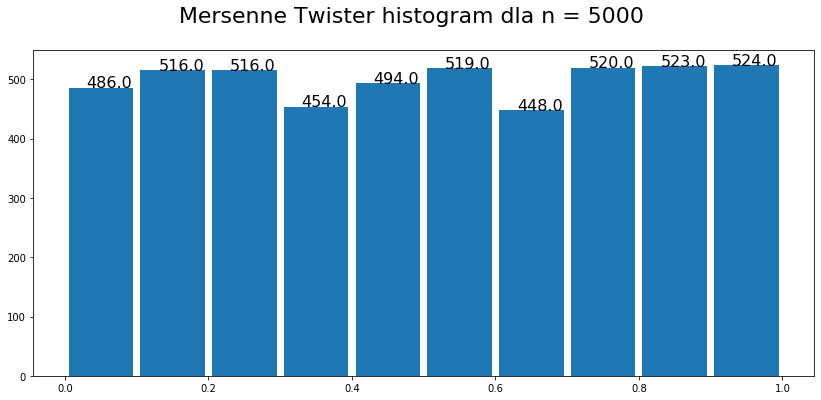

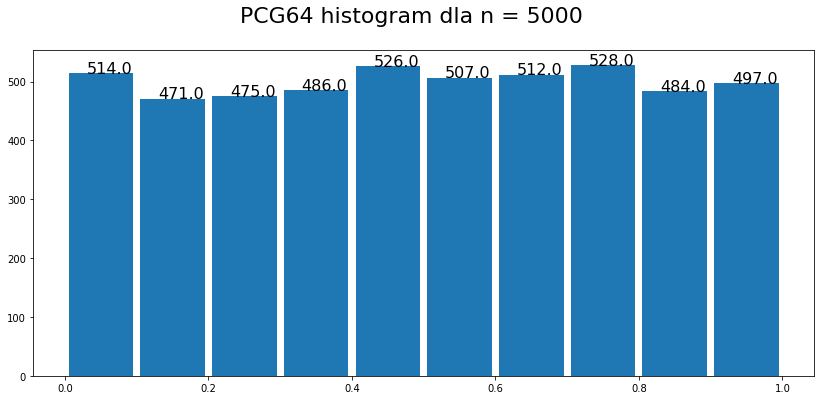

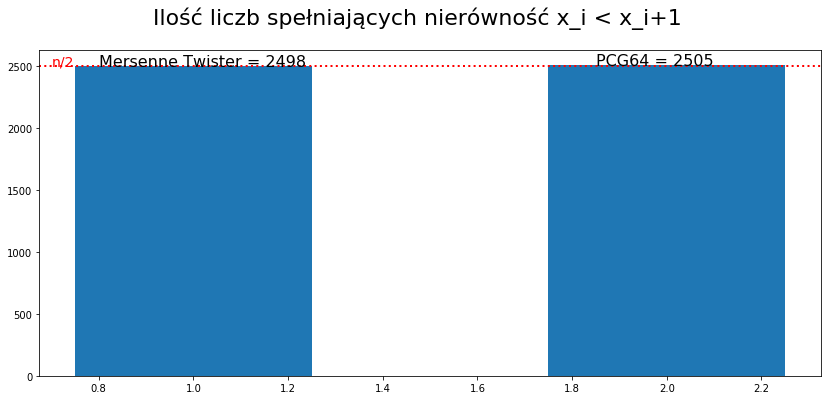



-----------Frequency Monobit Test dla n = 5000-----------

MERSENNE TWISTER

Frequency (Monobit) Test został spełniony? -> True
Test P_value -> 0.3362177972586421
Test s_obs -> 0.9616652224137046

--------------

PCG_64

Frequency (Monobit) Test został spełniony? -> True
Test P_value -> 0.42838423617623167
Test s_obs -> 0.7919595949289332


In [129]:
test_generators(N[2])

#### Podsumowanie

Różnice pomiędzy dwoma generatorami są niewielkie. Patrząc na histogramy, widać lekkie wahania (dla obu algorytmów wychylenia do ok. ~15% od wartości średniej). Patrząc na drugie kryterium (ilość liczb spełniających nierówność $x_i < x_{i+1}$), oba generatory zachowują się podobnie - ilość takich liczb oscyluję wokół liczby $\frac{n}{2}$. Natomiast w teście statystycznym, wyniki przemawiają za algorytmem `Mersenne Twister` - w każdym przypadku miał on większe `P_value` i mniejsze $s_{obs}$ - co oznaczałoby, że cechuje się "większą" losowością.

Dla obu algorytmów wyniki były tym lepsze i tym bardziej bliskie idealnemu rozkładowi losowemu, im większe było nasze $n$. Jest to zgodne z intuicją, ponieważ parametry losowe i statystyczne najlepiej sprawdzają się na dużych próbkach.

---
### Zadanie 2 Generowanie liczb z rozkładu normalnego

Zaimplementuj generator liczb losowych pochodzących z rozkładu normalnego za pomocą metody *Boksa-Mullera* i zaprezentuj wyniki dla $n = 10, 100, 5000$ wygenerowanych liczb. Funkcja powinna dodatkowo przyjmować wartość oczekiwaną oraz odchylenie standardowe jako parametry.
1. Zwizualizuj na wykresie rozkład liczb w 10 równych przedziałach. Na tym samym wykresie umieść funkcje gęstości prawdopodobieństwa rozkładu normalnego o takich samych parametrach.
2. Wykonaj test statystyczny *Shapiro-Wilka*, przedstaw uzyskaną p-wartość, informację czy hipoteza zerowa została przyjęta/odrzucona dla $\alpha = 0,05$ i czy w związku z tym, są podstawy do stwierdzenia, że liczby pochodzą z rozkładu normalnego.

In [130]:
def gauss_random(n, mean=0, sigma=1):
    mvn_array = np.random.uniform(size = n)
    for i in range(0, n-1, 2):
        R = np.sqrt(-2.0 * np.log(mvn_array[i]))
        omega = 2 * np.pi * mvn_array[i+1]
        mvn_array[i], mvn_array[i+1] = R * np.cos(omega), R * np.sin(omega)
    
    if n % 2 == 1:
        u = np.random.uniform()
        mvn_array[n-1] = np.sqrt(-2.0 * np.log(mvn_array[n-1])) * np.sin(2 * np.pi * u)
    
    return mvn_array * sigma + mean

Powyższa funkcja `gauss_random` przyjmuje:
* `n` - liczbę próbek z rozkładu normalnego
* `mean` - wartość oczekiwaną rozkładu normalnego
* `cov` - odchylenie standardowe rozkładu normalnego

i za pomocą transformacji *Boksa-Mullera* (https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generuje `n` próbek z rozkładu normalnego.

#### Funkcje pomocnicze do wizualizacji

In [131]:
def plot_normal_samples(samples, mean, sigma, title="", bins=10):
    n = samples.shape[0]
    
    fig = plt.figure(figsize=(14, 6))
    arr = plt.hist(samples, bins=bins, align="mid", rwidth=1)
    fig.suptitle(title, fontsize="22")
    
    x = np.linspace(mean - 3*sigma, mean + 3*sigma, 100)
    plt.plot(x, norm.pdf(x, mean, sigma)*n)
    
    plt.show()

In [132]:
def test_gauss_random(n, mean=3, sigma=2):
    samples = gauss_random(n, mean=mean, sigma=sigma)

    # 2.1
    plot_normal_samples(
        samples,
        mean,
        sigma,
        f"Histogram rozkładu normalnego dla n = {n}, $\mu = {mean}$, $\sigma = {sigma}$")
    
    # 2.2
    W, p_value = shapiro(samples)
    print(f"\n----------Test Shapiro Wilka dla n = {n}---------\n")
    print(f"Statystyka W dla testu -> {W}")
    print(f"p-wartość -> {p_value}")
    print(f"alpha = 0,05, p-wartosc > alpha ? -> {p_value > 0.05}")
    print(f"\nHipoteza zerowa zostala {'przyjeta' if p_value > 0.05 else 'odrzucona'}")


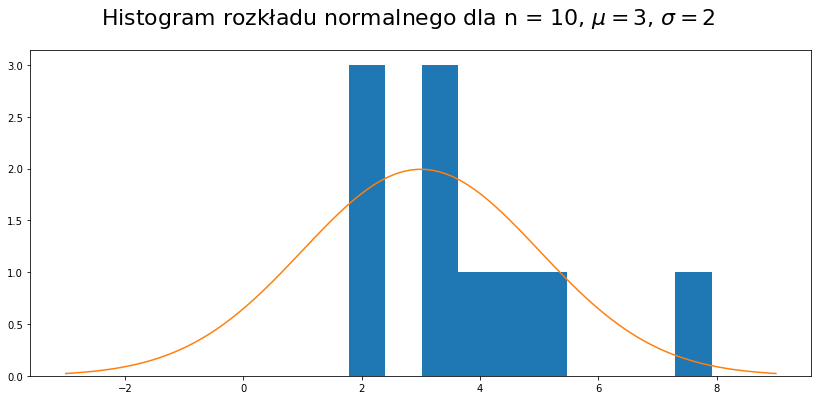


----------Test Shapiro Wilka dla n = 10---------

Statystyka W dla testu -> 0.8782122731208801
p-wartość -> 0.12445984035730362
alpha = 0,05, p-wartosc > alpha ? -> True

Hipoteza zerowa zostala przyjeta


In [133]:
test_gauss_random(10)

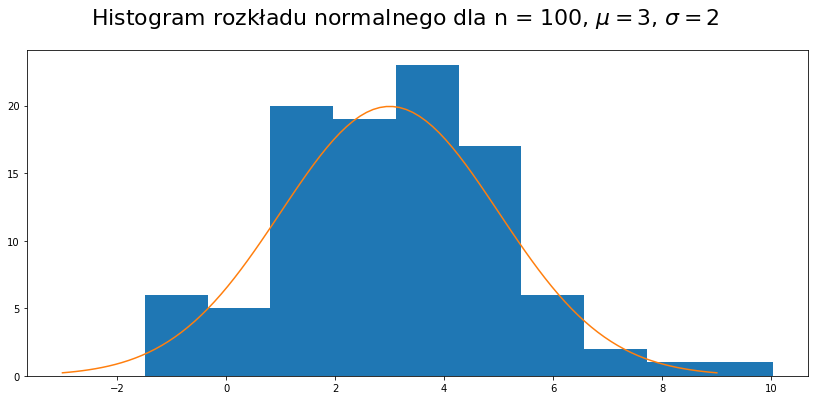


----------Test Shapiro Wilka dla n = 100---------

Statystyka W dla testu -> 0.9836255311965942
p-wartość -> 0.2517697513103485
alpha = 0,05, p-wartosc > alpha ? -> True

Hipoteza zerowa zostala przyjeta


In [134]:
test_gauss_random(100)

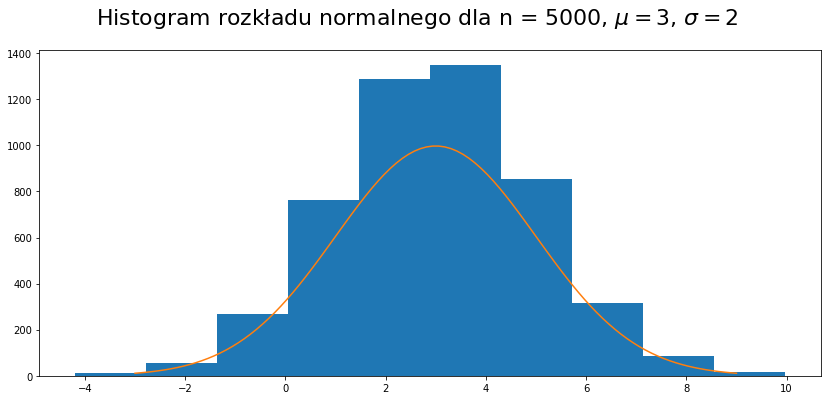


----------Test Shapiro Wilka dla n = 5000---------

Statystyka W dla testu -> 0.9997355937957764
p-wartość -> 0.8092570900917053
alpha = 0,05, p-wartosc > alpha ? -> True

Hipoteza zerowa zostala przyjeta


In [135]:
test_gauss_random(5000)

Widzimy, że dla $n=10$ histogram niezbyt pasuje do wykresu gęstości prawdopodobieństwa rozkładu normalnego. Dla $n = 100$ jest już nieco lepiej, ale to dla $n = 5000$ możemy najlepiej zaobserwować podobieństwo. Tak jak ustaliliśmy, rzeczywiście najwięcej próbek "trafiło" w okolicę wartości oczekiwanej $\mu = 3$.

Widzimy także, że dla $n = 10$ oraz $n = 100$ hipoteza zerowa w teście *Shapiro-Wilka* jest zazwyczaj przyjęta, ale może się zdarzyć, że zostanie odrzucona. Dla $n = 5000$ hipoteza zerowa zawsze zostaje przyjęta.

---
### Zadanie 3 Metoda Monte Carlo

Napisz funkcję która zwróci przybliżoną wartość liczby pi wykorzystującą metodę Monte Carlo do obliczenia pola powierzchni koła jednostkowego. Funkcja powinna przyjmować liczbę wylosowanych punktów jako parametr. Zwizualizuj koło, zaznaczając na jednym kolorem punkty które trafiły do jego wnętrza, a drugim te które trafiły na zewnątrz. Na wykresie zwizualizuj błąd bezwzględny wraz z rosnącą liczbą punktów

Spróbujmy wyprowadzić wzór na $\pi$ w sytuacji, za pomocą próbkowania metodą Monte Carlo.

Mając do dyspozycji generator liczb losowych, możemy wygenerować $n$ współrzędnych punktów $(x, y)$ gdzie $x, y \in (-1, 1)$. Tym sposobem wszystkie nasze wylosowane punkty należą do kwadratu o środku w punkcie $(0,0)$, boku o długości 2 oraz polu powierzchni $P = 4$.

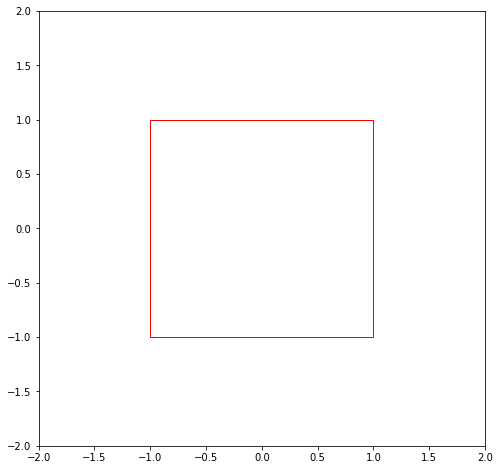

In [136]:
fig, ax = plt.subplots(1, figsize=(8,8))
ax.add_patch(patches.Rectangle((-1.0, -1.0), 2, 2, linewidth=1, edgecolor='r', facecolor='none'))
plt.axis([-2, 2, -2, 2])
plt.show();

Teraz narysujmy koło wpisane w ten kwadrat. Losując kolejne punkty możemy dzięki prostej nierówności $\sqrt{x_i^2 + y_i^2} \leq 1$ sprawdzić czy należą one do koła czy też nie. Ilość punktów należących do koła oznaczymy $a$.

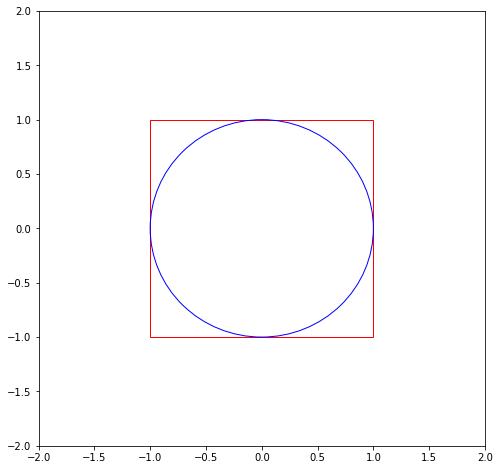

In [137]:
fig, ax = plt.subplots(1, figsize=(8,8))
ax.add_patch(patches.Rectangle((-1.0, -1.0), 2, 2, linewidth=1, edgecolor='r', facecolor='none'))
ax.add_patch(patches.Circle((0, 0), 1, linewidth=1, edgecolor='b', facecolor='none'))
plt.axis([-2, 2, -2, 2])
plt.show();

Teraz przy odpowiedniej ilości wylosowanych punktów, możemy założyć, że 
$$\large\begin{gather*}\\
\frac{P_{koła}}{P_{kwadratu}} = \frac{a}{n}\\
\\
\frac{\pi}{4} = \frac{a}{n}\\
\\
\pi = 4 \cdot \frac{a}{n}
\end{gather*} 
$$

Poniżej użyjemy powyższego wzoru do wyestymowania liczby $\pi$ dla różnej ilości wylosowanych próbek $n$.

In [138]:
def sample_points(count, d=2):
    
    points = np.random.uniform(-1, 1, (count, d))
    
    inner = points[np.linalg.norm(points, axis = 1) <= 1, :]
    
    outer = points[np.linalg.norm(points, axis = 1) > 1, :]
    
    return inner, outer


def estimate_pi(n):
    inner, _ = sample_points(n)
    
    a = inner.shape[0]
    
    return 4 * a / n

In [143]:
estimate_pi(5)

3.2

In [145]:
estimate_pi(1000)

3.136

Następnie zwizualizujemy rozkład punktów i zmianę błędu bezwzględnego wraz ze wzrostem punktów

In [ ]:
def plot_ax(axis, inner, outer):
    a, b = inner.shape[0], outer.shape[0]
    rect = patches.Rectangle((-1.0, -1.0), 2, 2, linewidth=1, edgecolor='r', facecolor='none')
    circle = patches.Circle((0, 0), 1, linewidth=1, edgecolor='b', facecolor='none')
    axes[i][j].add_patch(rect)
    axes[i][j].add_patch(circle)
    axes[i][j].set_xlim(-2, 2)
    axes[i][j].set_ylim(-2, 2)
    axes[i][j].set_title(f"n = {a+b}")
    axes[i][j].scatter(inner[:,0], inner[:,1], s=0.2, color='b')
    axes[i][j].scatter(outer[:,0], outer[:,1], s=0.2, color='r')
    

def get_error(inner, outer):
    a, b = inner.shape[0], outer.shape[0]
    
    estimated_pi = (4 * a) / (a + b)
    
    return abs(np.pi - estimated_pi)

In [ ]:
series_n = 20
N = np.array([2**i for i in range(series_n)])
fig, axes = plt.subplots(series_n//5, 5, figsize=(16, int(series_n * 0.6)))

errors = []

for i in range(len(axes)):
    for j in range(len(axes[i])):
        n = N[i * len(axes[i]) + j]
        inner, outer = sample_points(n)
        plot_ax(axes[i][j], inner, outer)
        
        errors.append(get_error(inner, outer))

In [ ]:
errors = np.array(errors)   
fig = plt.figure(figsize=(16, 8))
fig.suptitle("Zależność błędu bezwzględnego od ilość wylosowanych punktów")
plt.plot(N, errors);

In [ ]:
fig = plt.figure(figsize=(16, 8))
fig.suptitle("Zależność błędu bezwzględnego od logarytmu z ilośi wylosowanych punktów ($\log{N}$)")
plt.plot(np.log2(N), errors);

#### Obserwacje

Metoda Monte Carlo już dla ilości próbek $n$ rzędu ~$2^{10}$ daje dość dobrą dokładność z wyniku. Jednak dla ilości próbek rzędu ~$2^{4}$ i niższej jest **bardzo** niedokładna.

---
### Wnioski


* Dostępne biblioteczne generatory losowe nigdy nie będą idealne, ale w wystarczający sposób przypominają generator idealny.
* Do testowania losowości zbioru liczb (czyli też testowania generatora liczb losowych) służą nam różne testy statystyczne. Na tym labolatorium użyłem Frequency Monobit Test.
* Mając do dyspozycji generator liczb z rozkładu jednostajnego, możemy wylosować zbiór liczb z rozkładu normalnego za pomocą algorytmu Boksa-Mullera, a następnie przetestować ten zbiór testem Shapiro-Wilka.
* Algorytmy Monte-Carlo pozwalają nam na dobre przybliżenia różnych zadań, które są trudne do rozwiązania analitycznie. Mając do dyspozycji jedynie generator liczb z rokładu jednostajnego, możemy obliczyć np. liczbę pi lub na przykład całki oznaczone znanych funkcji (nierozwiązywalne na papierze). Warunkiem poprawnego działania jest jednak dostatecznie duża liczba wylosowanych próbek.

* Dostępne biblioteczne generatory losowe nigdy nie będą idealne, ale w wystarczający sposób przypominają generator idealny.
* Do testowania losowości zbioru liczb (czyli też testowania generatora liczb losowych) służą nam różne testy statystyczne. Na tym labolatorium użyłem Frequency Monobit Test.
* Mając do dyspozycji generator liczb z rozkładu jednostajnego, możemy wylosować zbiór liczb z rozkładu normalnego za pomocą algorytmu Boksa-Mullera, a następnie przetestować ten zbiór testem Shapiro-Wilka.
* Algorytmy Monte-Carlo pozwalają nam na dobre przybliżenia różnych zadań, które są trudne do rozwiązania analitycznie. Mając do dyspozycji jedynie generator liczb z rokładu jednostajnego, możemy obliczyć np. liczbę pi lub na przykład całki oznaczone znanych funkcji (nierozwiązywalne na papierze). Warunkiem poprawnego działania jest jednak dostatecznie duża liczba wylosowanych próbek.

In [146]:
def plot_ax(axis, inner, outer):
    a, b = inner.shape[0], outer.shape[0]
    rect = patches.Rectangle((-1.0, -1.0), 2, 2, linewidth=1, edgecolor='r', facecolor='none')
    circle = patches.Circle((0, 0), 1, linewidth=1, edgecolor='b', facecolor='none')
    axes[i][j].add_patch(rect)
    axes[i][j].add_patch(circle)
    axes[i][j].set_xlim(-2, 2)
    axes[i][j].set_ylim(-2, 2)
    axes[i][j].set_title(f"n = {a+b}")
    axes[i][j].scatter(inner[:,0], inner[:,1], s=0.2, color='b')
    axes[i][j].scatter(outer[:,0], outer[:,1], s=0.2, color='r')
    

def get_error(inner, outer):
    a, b = inner.shape[0], outer.shape[0]
    
    estimated_pi = (4 * a) / (a + b)
    
    return abs(np.pi - estimated_pi)

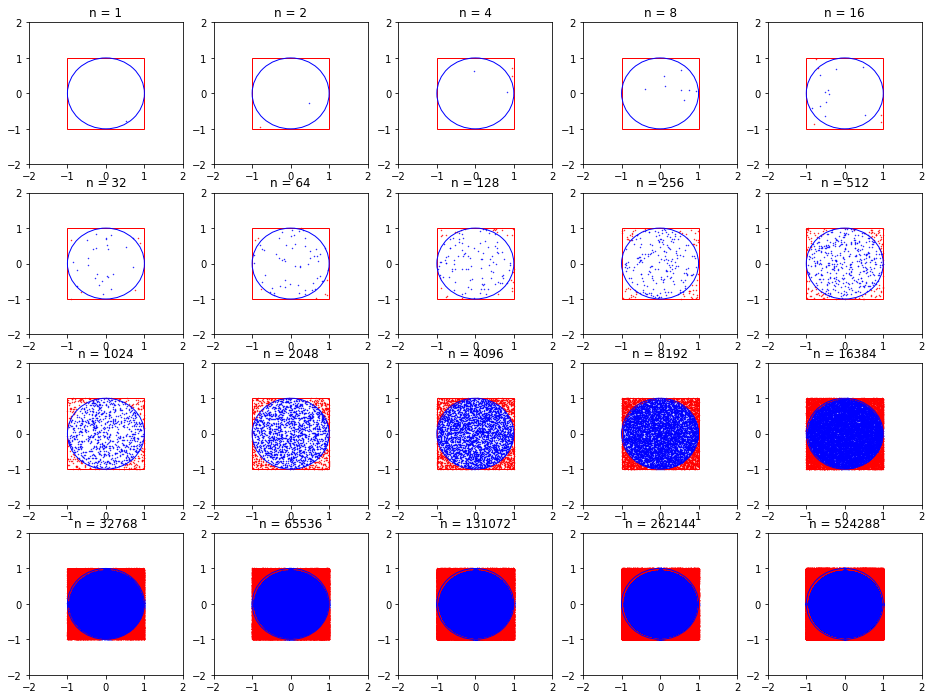

In [147]:
series_n = 20
N = np.array([2**i for i in range(series_n)])
fig, axes = plt.subplots(series_n//5, 5, figsize=(16, int(series_n * 0.6)))

errors = []

for i in range(len(axes)):
    for j in range(len(axes[i])):
        n = N[i * len(axes[i]) + j]
        inner, outer = sample_points(n)
        plot_ax(axes[i][j], inner, outer)
        
        errors.append(get_error(inner, outer))

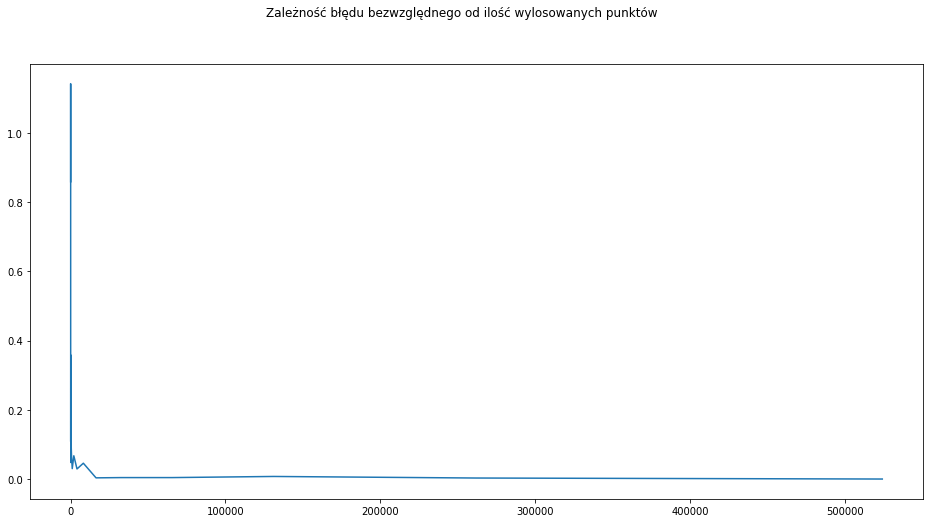

In [148]:
errors = np.array(errors)   
fig = plt.figure(figsize=(16, 8))
fig.suptitle("Zależność błędu bezwzględnego od ilość wylosowanych punktów")
plt.plot(N, errors);

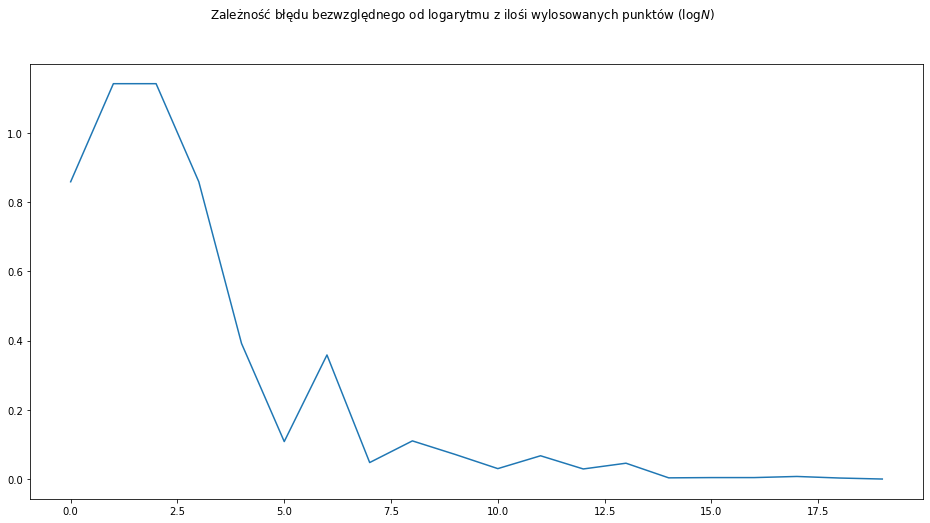

In [149]:
fig = plt.figure(figsize=(16, 8))
fig.suptitle("Zależność błędu bezwzględnego od logarytmu z ilośi wylosowanych punktów ($\log{N}$)")
plt.plot(np.log2(N), errors);

#### Obserwacje

Metoda Monte Carlo już dla ilości próbek $n$ rzędu ~$2^{10}$ daje dość dobrą dokładność z wyniku. Jednak dla ilości próbek rzędu ~$2^{4}$ i niższej jest **bardzo** niedokładna.

---
### Wnioski


* Dostępne biblioteczne generatory losowe nigdy nie będą idealne, ale w wystarczający sposób przypominają generator idealny.
* Do testowania losowości zbioru liczb (czyli też testowania generatora liczb losowych) służą nam różne testy statystyczne. Na tym labolatorium użyłem Frequency Monobit Test.
* Mając do dyspozycji generator liczb z rozkładu jednostajnego, możemy wylosować zbiór liczb z rozkładu normalnego za pomocą algorytmu Boksa-Mullera, a następnie przetestować ten zbiór testem Shapiro-Wilka.
* Algorytmy Monte-Carlo pozwalają nam na dobre przybliżenia różnych zadań, które są trudne do rozwiązania analitycznie. Mając do dyspozycji jedynie generator liczb z rokładu jednostajnego, możemy obliczyć np. liczbę pi lub na przykład całki oznaczone znanych funkcji (nierozwiązywalne na papierze). Warunkiem poprawnego działania jest jednak dostatecznie duża liczba wylosowanych próbek.